Notebook provided by Arto Javanainen, University of Jyvaskyla,
FINLAND. https://www.researchgate.net/profile/Arto_Javanainen

# Regular SRIM Calculation

SRIM is a group of programs which calculate the stopping and range of ions (up to 2 GeV/amu) into matter using a quantum mechanical treatment of ion-atom collisions (assuming a moving atom as an "ion", and all target atoms as "atoms"). This calculation is made very efficient by the use of statistical algorithms which allow the ion to make jumps between calculated collisions and then averaging the collision results over the intervening gap. During the collisions, the ion and atom have a screened Coulomb collision, including exchange and correlation interactions between the overlapping electron shells. The ion has long range interactions creating electron excitations and plasmons within the target. These are described by including a description of the target's collective electronic structure and interatomic bond structure when the calculation is setup (tables of nominal values are supplied). The charge state of the ion within the target is described using the concept of effective charge, which includes a velocity dependent charge state and long range screening due to the collective electron sea of the target. 

1000.0


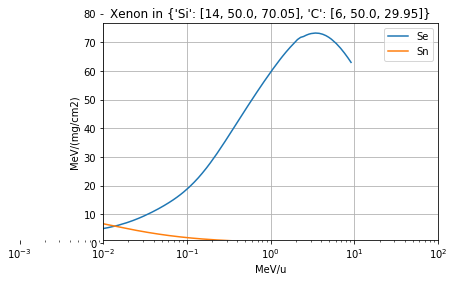

In [4]:
%matplotlib inline

import os
from pprint import pprint

# Only needed to embed the images in notebook
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt

from srim import SR, Ion, Layer, Target

# Construct a Nickel ion
ion = Ion('Xe', energy=1.2e9)

# Construct a layer of nick 20um thick with a displacement energy of 30 eV
layer = Layer({
    'Si': {
        'stoich': 0.5,
        'E_d': 35.0, # Displacement Energy
        'lattice': 0.0,
        'surface': 3.0
    },
    'C': {
        'stoich': 0.5,
        'E_d': 20.0, # Displacement Energy
        'lattice': 0.0,
        'surface': 3.0
    }
}, density=3.21, width=10000.0)

target = Target([layer])

srim = SR(layer, ion, output_type=5)

#If you have troubles with casting to floats in the output file (e.g. 999,999), you can include the following line to circumvent it:
#srim.settings.energy_min = 1200

print(srim.settings.energy_min)

# Specify the directory of SRIM.exe
# For windows users the path will include C://...
# The directory must have SRIM 2013 installed. TRIM.exe should be in this folder
srim_executable_directory = '/tmp/srim/' 

# takes about 1 seconds on my laptop
results = srim.run(srim_executable_directory)

x = 1e-3*results.data[0]/results.ion['A1']

plt.plot(x, results.data[1], label='Se')
plt.plot(x, results.data[2], label='Sn')
plt.legend()

plt.xlabel('MeV/u')
plt.ylabel(results.units)
plt.title(results.ion['name']+' in '+str(list(results.target.values())[-1]))
plt.xscale('log')
#plt.yscale('log')
plt.xlim(1e-2, 1e2)
plt.ylim(1, None)
plt.grid()
plt.show()